In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import joblib
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor

In [61]:
log_x = FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=True)
log_y = FunctionTransformer(np.log1p, inverse_func=np.expm1, validate=True)

In [62]:
url = "100000 roots.csv"
data = pd.read_csv(url)

In [63]:
features = data[['number']]
target = data[['square_root']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [65]:
model = RandomForestRegressor(
    n_estimators=50,        # Start with 50 trees (good balance between performance & speed)
    max_depth=15,           # Limit tree depth to reduce memory and overfitting
    min_samples_leaf=4,     # Prevent overly small leaf nodes (improves generalisation)
    max_features='sqrt',    # Use sqrt(n_features) at each split (standard practice)
    n_jobs=-1,              # Use all CPU cores for parallel processing
    random_state=42,        # For reproducibility
    verbose=1               # Optional: shows training progress
)

# Train the model
model.fit(X_train, y_train)

base_pipeline = Pipeline([
    ('log_X', log_x),
    ('rf', RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        min_samples_leaf=3,
        max_features='sqrt',
        n_jobs=-1,
        random_state=42
    ))
])

model2 = TransformedTargetRegressor(
    regressor=base_pipeline,
    func=np.log1p,
    inverse_func=np.expm1
)

model2.fit(X_test,y_test)

c:\Users\joshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished
c:\Users\joshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


,regressor,Pipeline(step...m_state=42))])
,transformer,None
,func,<ufunc 'log1p'>
,inverse_func,<ufunc 'expm1'>
,check_inverse,True
,func,<ufunc 'log1p'>
,inverse_func,<ufunc 'expm1'>
,validate,True
,accept_sparse,False
,check_inverse,True
,feature_names_out,None


In [66]:
print("Model accuracy:", model.score(X_test, y_test))
joblib.dump(model, 'Starndard regrssion model.pkl')
joblib.dump(model2, 'logerithmic regrssion model.pkl')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


Model accuracy: 0.9999999958591699


['logerithmic regrssion model.pkl']

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


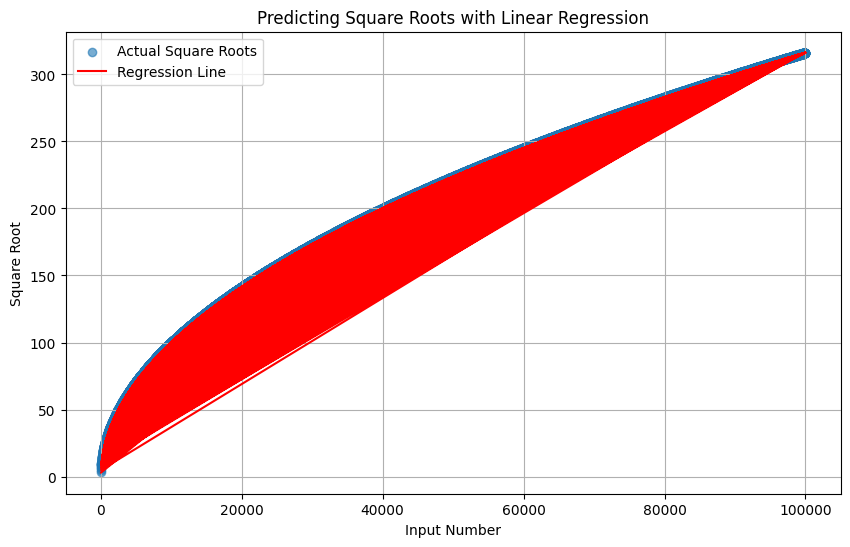

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual Square Roots', alpha=0.6)
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')
plt.title('Predicting Square Roots with Linear Regression')
plt.xlabel('Input Number')
plt.ylabel('Square Root')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("R² Score:", r2)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


MSE: 2.299019851531528e-05
R² Score: 0.9999999958591699


In [ ]:
while True:
    user_input = input("Enter a number to find its square root (or 'q' to quit): ")

    if user_input.lower() == 'q':
        print("Exiting. Thanks for playing!")
        break

    try:
        number = float(user_input)
        prediction = model.predict([[number]])[0]
        prediction2 = model2.predict([[number]])[0]
        actual = number ** 0.5
        error1 = abs(prediction - actual)
        error2 = abs(predictions2 - actual)

        print(f"🤖 Model1's guess: {prediction}")
        print(f"🤖 Model2's guess: {prediction2}")
        print(f"✅ Actual square root: {actual}")
        print(f"📉 Error for model1: {error1}\n")
        print(f"📉 Error for model2: {error2}\n")

    except ValueError:
        print("⚠️ Please enter a valid number.\n")

c:\Users\joshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
c:\Users\joshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


🤖 Model1's guess: 1.9485037747821548
🤖 Model2's guess: 1.9485037747821548
✅ Actual square root: 1.7320508075688772
📉 Error for model1: 0.21645296721327756

📉 Error for model2: [[273.4403862 ]
 [281.43956863]
 [139.22414708]
 ...
 [192.84754021]
 [229.40231013]
 [204.21608567]]



c:\Users\joshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
c:\Users\joshu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished


🤖 Model1's guess: 3.0976194294277213
🤖 Model2's guess: 3.097619429427722
✅ Actual square root: 3.1622776601683795
📉 Error for model1: 0.06465823074065824

📉 Error for model2: [[272.01015935]
 [280.00934177]
 [137.79392022]
 ...
 [191.41731336]
 [227.97208328]
 [202.78585882]]

⚠️ Please enter a valid number.

Exiting. Thanks for playing!
